# Question

## 5. Draw the ROC curve

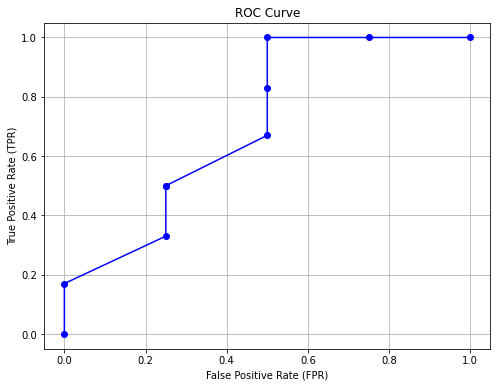

In [158]:
import numpy as np
import matplotlib.pyplot as plt

confidences = [0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1]
correct_classes = [1, 1, 0, 1, 1, 0, 1, 1, 0, 0]
sorted_data = sorted(zip(confidences, correct_classes), reverse=True)

thresholds = list(np.around(np.array(np.linspace(0, 1, 10)), 2)) 
roc_points = [] 

for threshold in thresholds:
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for confidence, correct_class in sorted_data:
        if (confidence >= threshold): predicted_value = 1
        else: predicted_value = 0
        #print(f"confidence: {confidence}, correct: {correct_class}, predicted: {predicted_value}, threshold: {threshold}")
        if ((correct_class == 1) & (predicted_value == 1)):
            tp += 1
        elif ((correct_class == 0) & (predicted_value == 0)):
            tn += 1
        elif ((correct_class == 0) & (predicted_value == 1)):
            fp += 1
        elif ((correct_class == 1) & (predicted_value == 0)):
            fn += 1
            
    tpr = round(tp / (tp + fn), 2)
    fpr = round(fp / (fp + tn), 2)
    #print(f"tp: {tp}, tn: {tn}, fp: {fp}, fn: {fn}")
    #print(f"tpr: {tpr}, fpr: {fpr}")
    roc_points.append((fpr, tpr))    

# Extract FPR and TPR values for the ROC curve
fpr_values, tpr_values = zip(*roc_points)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, marker='o', linestyle='-', color='b')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.grid(True)
plt.show()


In [162]:
pd.DataFrame({'fpr': fpr_values, 'tpr': tpr_values, 'threshods': thresholds})

,fpr,tpr,threshods
0,1.00,1.00,0.00
1,0.75,1.00,0.11
2,0.50,1.00,0.22
3,0.50,0.83,0.33
4,0.50,0.67,0.44
5,0.25,0.50,0.56
6,0.25,0.50,0.67
7,0.25,0.33,0.78
8,0.00,0.17,0.89
9,0.00,0.00,1.00


# Programming

## 1. Visualize the predictions of 1NN on a 2D grid

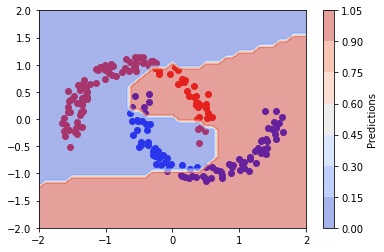

In [5]:
import numpy as np
import matplotlib.pyplot as plt

D2z_data = np.loadtxt("./hw3Data/D2z.txt", delimiter=" ")

X_train = D2z_data[:, :-1]
y_train = D2z_data[:, -1]

x1_range = np.arange(-2, 2.1, 0.1)
x2_range = np.arange(-2, 2.1, 0.1)

x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
test_points = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))

# create an array (filled with zeros) to store predictions
predictions = np.zeros_like(x1_grid)

# for each test point, find the nearest neighbor in the training set
for i in range(len(x1_range)):
    for j in range(len(x2_range)):
        test_point = np.array([[x1_range[i], x2_range[j]]])
        distances = np.linalg.norm(X_train - test_point, axis=1) 
        nearest_neighbor_index = np.argmin(distances) #1NN
        predictions[i, j] = y_train[nearest_neighbor_index]

# draw a scatter plot for training set
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='b', label='Class 0 (Training)') #X1
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='r', label='Class 1 (Training)') #X2

# draw a contour plot for test points and their predictions
plt.contourf(x1_grid, x2_grid, predictions, alpha=0.5, cmap=plt.cm.coolwarm)
plt.colorbar(label='Predictions')

# show the plot
plt.show()


## 2. Email spacm detector

- Task: spam detection 
- The number of rows: 5000 
- The number of features: 3000 (Word frequency in each email)
- The label (y) column name: ‘Predictor’
- For a single training/test set split, use Email 1-4000 as the training set, Email 4001-5000 as the test set.
- For 5-fold cross validation, split dataset in the following way.
    - Fold 1, test set: Email 1-1000, training set: the rest (Email 1001-5000)
    - Fold 2, test set: Email 1000-2000, training set: the rest
    - Fold 3, test set: Email 2000-3000, training set: the rest
    - Fold 4, test set: Email 3000-4000, training set: the rest
    - Fold 5, test set: Email 4000-5000, training set: the rest

In [27]:
import pandas as pd

email_data = pd.read_csv("./hw3Data/emails.csv", header=0, index_col=0)
X = email_data.drop(columns=['Prediction'])
y = email_data['Prediction']

In [119]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def one_nn_classifier(X_train, y_train, x_test):
    min_distance = float('inf')
    nearest_neighbor = None

    for x_train, label in zip(X_train, y_train):
        distance = euclidean_distance(x_test, x_train)
        if distance < min_distance:
            min_distance = distance
            nearest_neighbor = label
    return nearest_neighbor

In [121]:
# 5-fold cross-validation
k = 5
fold_size = len(X) // k

for i in range(5):
    test_start = i * fold_size
    test_end = (i + 1) * fold_size
    X_test_fold = X[test_start:test_end]
    y_test_fold = y[test_start:test_end]
    print(f"Fold {i + 1}:  test start from {test_start} to {test_end}")
    
    X_train_fold = np.concatenate((X[:test_start], X[test_end:]), axis=0)
    y_train_fold = np.concatenate((y[:test_start], y[test_end:]), axis=0)

    # 1NN classification for each test instance
    y_pred_fold = [one_nn_classifier(X_train_fold, y_train_fold, x_test) for x_test in X_test_fold.to_numpy()]

    # calculate accuracy, precision, and recall for the fold
    correct_predictions = np.sum(y_pred_fold == y_test_fold)
    total_predictions = len(y_test_fold)

    accuracy_fold = correct_predictions / total_predictions
    precision_fold = np.sum((y_pred_fold) & (y_test_fold)) / np.sum(y_pred_fold)
    recall_fold = np.sum((y_pred_fold) & (y_test_fold)) / np.sum(y_test_fold)
    
    print(f"Accuracy: {accuracy_fold:.4f}, Precision: {precision_fold:.4f}, Recall: {recall_fold:.4f}")

Fold 1:  test start from 0 to 1000
Accuracy: 0.8250, Precision: 0.6545, Recall: 0.8175
Fold 2:  test start from 1000 to 2000
Accuracy: 0.8530, Precision: 0.6857, Recall: 0.8664
Fold 3:  test start from 2000 to 3000
Accuracy: 0.8620, Precision: 0.7212, Recall: 0.8380
Fold 4:  test start from 3000 to 4000
Accuracy: 0.8510, Precision: 0.7164, Recall: 0.8163
Fold 5:  test start from 4000 to 5000
Accuracy: 0.7750, Precision: 0.6057, Recall: 0.7582


## 3. Logistic Regression

In [125]:
# the logistic regression model
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        m = X.shape[0]

        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        return (h >= 0.5).astype(int)

k = 5
fold_size = len(X) // k
learning_rate=0.01

for i in range(k):
    test_start = i * fold_size
    test_end = (i + 1) * fold_size
    X_test_fold = X[test_start:test_end].to_numpy()
    y_test_fold = y[test_start:test_end].to_numpy()
    print(f"Fold {i + 1}:  learning rate: {learning_rate}")
    
    X_train_fold = np.concatenate((X[:test_start], X[test_end:]), axis=0)
    y_train_fold = np.concatenate((y[:test_start], y[test_end:]), axis=0)

    # train the logistic regression model
    model = LogisticRegression(learning_rate)
    model.fit(X_train_fold, y_train_fold)

    # make predictions on the test fold
    y_pred_fold = model.predict(X_test_fold)

    # accuracy, precision, and recall for the fold
    correct_predictions = np.sum(y_pred_fold == y_test_fold)
    total_predictions = len(y_test_fold)

    accuracy_fold = correct_predictions / total_predictions
    precision_fold = np.sum((y_pred_fold) & (y_test_fold)) / np.sum(y_pred_fold)
    recall_fold = np.sum((y_pred_fold) & (y_test_fold)) / np.sum(y_test_fold)
    
    learning_rate=learning_rate*0.99

    print(f"Accuracy: {accuracy_fold:.4f}, Precision: {precision_fold:.4f}, Recall: {recall_fold:.4f}")


Fold 1:  learning rate: 0.01


<ipython-input-125-43f54a5cffb3>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: 0.9150, Precision: 0.8876, Recall: 0.8035
Fold 2:  learning rate: 0.0099
Accuracy: 0.8970, Precision: 0.8246, Recall: 0.7978
Fold 3:  learning rate: 0.009801
Accuracy: 0.8910, Precision: 0.8277, Recall: 0.7782
Fold 4:  learning rate: 0.00970299
Accuracy: 0.7980, Precision: 0.9510, Recall: 0.3299
Fold 5:  learning rate: 0.0096059601
Accuracy: 0.8480, Precision: 0.7810, Recall: 0.6993


## 4. 5-fold cross validation with kNN varying k (k=1, 3, 5, 7, 10)

k = 1, Average Accuracy: 0.8344
k = 3, Average Accuracy: 0.8410
k = 5, Average Accuracy: 0.8418
k = 7, Average Accuracy: 0.8452
k = 10, Average Accuracy: 0.8558


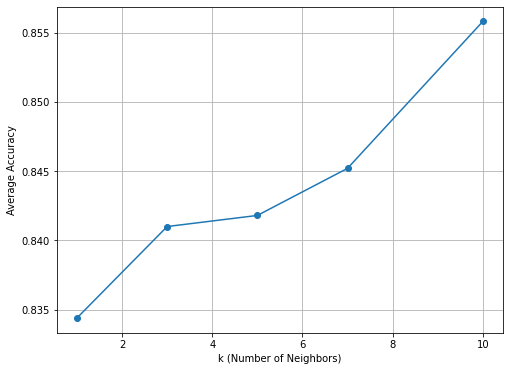

k = 1, Average Accuracy: 0.8344
k = 3, Average Accuracy: 0.8410
k = 5, Average Accuracy: 0.8418
k = 7, Average Accuracy: 0.8452
k = 10, Average Accuracy: 0.8558


In [126]:
# the kNN classifier
class kNNClassifier:
    def __init__(self, k):
        self.k = k

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        # indices of k-nearest samples
        k_indices = np.argsort(distances)[:self.k]
        # the labels of the k-nearest samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # the most common class label
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# kNN classification with varying k
k_values = [1, 3, 5, 7, 10]
average_accuracies = []

for k in k_values:
    accuracy_scores = []

    # 5-fold cross-validation
    for i in range(5):

        test_start = i * fold_size
        test_end = (i + 1) * fold_size
        X_test_fold = X[test_start:test_end].to_numpy()
        y_test_fold = y[test_start:test_end].to_numpy()

        X_train_fold = np.concatenate((X[:test_start], X[test_end:]), axis=0)
        y_train_fold = np.concatenate((y[:test_start], y[test_end:]), axis=0)

        # train the kNN classifier
        model = kNNClassifier(k)
        model.fit(X_train_fold, y_train_fold)

        y_pred_fold = model.predict(X_test_fold)

        correct_predictions = np.sum(y_pred_fold == y_test_fold)
        total_predictions = len(y_test_fold)
        accuracy_fold = correct_predictions / total_predictions

        accuracy_scores.append(accuracy_fold)

    # average accuracy for the current k
    average_accuracy = np.mean(accuracy_scores)
    average_accuracies.append(average_accuracy)
    print(f"k = {k}, Average Accuracy: {average_accuracy:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(k_values, average_accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()

for k, avg_acc in zip(k_values, average_accuracies):
    print(f"k = {k}, Average Accuracy: {avg_acc:.4f}")

## 5. Train kNN and logistic regression and draw ROC curves

In [163]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        m = X.shape[0]

        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient

    def predict(self, X, threshold):
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        return (h >= threshold).astype(int)

In [170]:
class kNNClassifier:
    def __init__(self, k):
        self.k = k

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, threshold):
        y_pred = [self._predict(x, threshold) for x in X]
        return np.array(y_pred)

    def _predict(self, x, threshold):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        
        # the labels of the k-nearest samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # the most common class label
        #most_common = np.bincount(k_nearest_labels).argmax()
        
        # calculate the ratio of neighbors whose label is 1
        ratio_class_1 = sum(k_nearest_labels) / self.k
        
        return (ratio_class_1 >= threshold).astype(int)

In [ ]:
X_train = X[:4000].to_numpy()
y_train = y[:4000].to_numpy()

X_test = X[4001: ].to_numpy()
y_test = y[4001: ].to_numpy()

In [172]:
logistic_model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
logistic_model.fit(X_train, y_train)

lg_thresholds = np.linspace(0, 1, 100)
logistic_tpr_values = []
logistic_fpr_values = []

for threshold in lg_thresholds:
    y_pred_logistic = logistic_model.predict(X_test, threshold)
    
    lg_tp = np.sum((y_pred_logistic == 1) & (y_test == 1))
    lg_fp = np.sum((y_pred_logistic == 1) & (y_test == 0))
    lg_tn = np.sum((y_pred_logistic == 0) & (y_test == 0))
    lg_fn = np.sum((y_pred_logistic == 0) & (y_test == 1))

    lg_tpr = lg_tp / (lg_tp + lg_fn)
    lg_fpr = lg_fp / (lg_fp + lg_tn)

    logistic_tpr_values.append(lg_tpr)
    logistic_tpr_values.append(lg_fpr)

<ipython-input-163-18ef5d30de2c>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [ ]:
knn_model = kNNClassifier(5)
knn_model.fit(X_train, y_train)

knn_thresholds = np.linspace(0, 1, 100)
knn_tpr_values = []
knn_fpr_values = []

for threshold in knn_thresholds:
    y_pred_knn = knn_model.predict(X_test, threshold)
    
    knn_tp = np.sum((y_pred_knn == 1) & (y_test == 1))
    knn_fp = np.sum((y_pred_knn == 1) & (y_test == 0))
    knn_tn = np.sum((y_pred_knn == 0) & (y_test == 0))
    knn_fn = np.sum((y_pred_knn == 0) & (y_test == 1))

    knn_tpr = knn_tp / (knn_tp + knn_fn)
    knn_fpr = knn_fp / (knn_fp + knn_tn)

    knn_tpr_values.append(knn_tpr)
    knn_tpr_values.append(knn_fpr)

In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, label='kNN')
plt.xlabel('False Positive Rate (Positive label: 1)')
plt.ylabel('True Positive Rate (Positive label: 1)')
plt.legend()
plt.grid(True)
plt.show()